# SCRAPING DATA

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.netflix.mediaclient',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi netflix yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, #kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=5000, #disini jumlah ulasan yang mau kita ambil ada lima ribu
    filter_score_with=None #kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,27b8abd0-9ad0-45e0-b9aa-db6c06b58379,Binta Andreina,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong dong DIPERHATIKAN pihak netflix, ini ud...",1,63,8.94.0 build 10 50546,2023-11-10 12:48:12,None,None,8.94.0 build 10 50546
1,f126c8f1-4499-4eb1-86cd-292d1ee49a66,Siti Mafrukha,https://play-lh.googleusercontent.com/a-/ALV-U...,Sebell semakin diupdate bukannya makin oke mal...,1,3,8.94.0 build 10 50546,2023-11-12 15:01:53,None,None,8.94.0 build 10 50546
2,7d9c07b6-ee82-41b6-afed-86910b843add,nandira Ayu,https://play-lh.googleusercontent.com/a-/ALV-U...,"Baru aja mulai langganan lagi, udh update terb...",1,159,8.93.1 build 4 50540,2023-11-02 04:37:47,None,None,8.93.1 build 4 50540
3,8d910536-174d-4d57-b368-48d222a3cbe2,Tini Rosmiatin,https://play-lh.googleusercontent.com/a-/ALV-U...,"Sudah lama berlangganan Netflix, dari dulu sam...",5,592,8.88.0 build 6 50512,2023-10-01 11:58:42,None,None,8.88.0 build 6 50512
4,1fe819a0-e762-4559-aeb7-f11289ec4e52,Ihda Dian Kusuma,https://play-lh.googleusercontent.com/a/ACg8oc...,Netflix nya kenapa jadi tidak bisa dibuka? Lag...,1,0,8.94.0 build 10 50546,2023-11-10 21:26:05,None,None,8.94.0 build 10 50546


In [ ]:
df_busu.shape

(5000, 11)

In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
1129,Paadilee 2701,1,2023-11-13 13:25:30,kenapa sering ngelag deh???? 😭😭
907,Ni kadek Junia Susanti_XI K2,1,2023-11-13 13:17:23,"Begini ya, saya pengbuna baru trus tadi itu ad..."
437,PUBG MOBILE,1,2023-11-13 12:49:31,film yang saya tonton tiba-tiba hilang dan tid...
2254,Nisa Oktiari,1,2023-11-13 10:36:12,"baru didownload tapi ga bisa masuk,stuck di tu..."
176,Alvin Bhaskara,1,2023-11-13 08:03:38,"Ribet, kalau mau nonton di tv harus pake kode ..."


In [ ]:
my_df=sorted_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.

In [ ]:
my_df.head()

,content,score
1129,kenapa sering ngelag deh???? 😭😭,1
907,"Begini ya, saya pengbuna baru trus tadi itu ad...",1
437,film yang saya tonton tiba-tiba hilang dan tid...,1
2254,"baru didownload tapi ga bisa masuk,stuck di tu...",1
176,"Ribet, kalau mau nonton di tv harus pake kode ...",1


In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-31-674b4ca6ef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
1129,kenapa sering ngelag deh???? 😭😭,1,Negatif
907,"Begini ya, saya pengbuna baru trus tadi itu ad...",1,Negatif
437,film yang saya tonton tiba-tiba hilang dan tid...,1,Negatif
2254,"baru didownload tapi ga bisa masuk,stuck di tu...",1,Negatif
176,"Ribet, kalau mau nonton di tv harus pake kode ...",1,Negatif
59,Saya berhenti langganan tgl 12 Oktober akan di...,1,Negatif
1091,ANDAI AJA LO GRATIS DAN GAK HARUS BAYAR BUAT B...,1,Negatif
3299,Banyakin lagi kolaborasi sama Dev game indie,5,Positif
148,Loading nya lemot banget padahal WiFi udah bag...,3,Netral
3558,aniing mask baru loggin sdh harus bayar kayak ...,1,Negatif


# PRE-PROCESSING

In [ ]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [ ]:
my_df.duplicated().sum()

177

In [ ]:
df = my_df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(4823, 3)

In [ ]:
df.to_excel("playstore_netflix_scraping.xlsx", index = False)  #kemudian save menjadi file xlsx

In [ ]:
!pip install nltk
!pip install sastrawi
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Load data from Excel file
file_path = 'playstore_netflix_scraping.xlsx'
my_df = pd.read_excel(file_path)

In [ ]:
# Proses Cleaning

def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")

my_df['content'] = my_df['content'].apply(remove_kata)


def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

my_df['content'] = my_df['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

my_df['content'] = my_df['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

my_df['content'] = my_df['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

my_df['content'] = my_df['content'].apply(remove_single_char)


print('Hasil Cleaning: \n')
my_df.head(20)

Hasil Cleaning: 



,content,score,Label
0,kenapa sering ngelag deh,1,Negatif
1,begini ya saya pengbuna baru trus tadi itu ada...,1,Negatif
2,film yang saya tonton tibatiba hilang dan tida...,1,Negatif
3,baru didownload tapi ga bisa masukstuck di tul...,1,Negatif
4,ribet kalau mau nonton di tv harus pake kode v...,1,Negatif
5,saya berhenti langganan tgl oktober akan di tu...,1,Negatif
6,andai aja lo gratis dan gak harus bayar buat b...,1,Negatif
7,banyakin lagi kolaborasi sama dev game indie,5,Positif
8,loading nya lemot banget padahal wifi udah bag...,3,Netral
9,aniing mask baru loggin sdh harus bayar kayak ...,1,Negatif


In [ ]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
my_df['content'] = my_df['content'].apply(casefolding)
print('Hasil Case Folding: \n')
my_df.head(20)

Hasil Case Folding: 



,content,score,Label
0,kenapa sering ngelag deh,1,Negatif
1,begini ya saya pengbuna baru trus tadi itu ada...,1,Negatif
2,film yang saya tonton tibatiba hilang dan tida...,1,Negatif
3,baru didownload tapi ga bisa masukstuck di tul...,1,Negatif
4,ribet kalau mau nonton di tv harus pake kode v...,1,Negatif
5,saya berhenti langganan tgl oktober akan di tu...,1,Negatif
6,andai aja lo gratis dan gak harus bayar buat b...,1,Negatif
7,banyakin lagi kolaborasi sama dev game indie,5,Positif
8,loading nya lemot banget padahal wifi udah bag...,3,Netral
9,aniing mask baru loggin sdh harus bayar kayak ...,1,Negatif


In [ ]:
my_df.to_excel('netflix_cleaning.xlsx', index=False)

data_fold = pd.read_excel('netflix_cleaning.xlsx')
print(data_fold.shape)
print(data_fold.head())

(4823, 3)
                                             content  score    Label
0                           kenapa sering ngelag deh      1  Negatif
1  begini ya saya pengbuna baru trus tadi itu ada...      1  Negatif
2  film yang saya tonton tibatiba hilang dan tida...      1  Negatif
3  baru didownload tapi ga bisa masukstuck di tul...      1  Negatif
4  ribet kalau mau nonton di tv harus pake kode v...      1  Negatif


In [ ]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

my_df['content'] = my_df['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(my_df.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                              content  score    Label
0                       [kenapa, sering, ngelag, deh]      1  Negatif
1   [begini, ya, saya, pengbuna, baru, trus, tadi,...      1  Negatif
2   [film, yang, saya, tonton, tibatiba, hilang, d...      1  Negatif
3   [baru, didownload, tapi, ga, bisa, masukstuck,...      1  Negatif
4   [ribet, kalau, mau, nonton, di, tv, harus, pak...      1  Negatif
5   [saya, berhenti, langganan, tgl, oktober, akan...      1  Negatif
6   [andai, aja, lo, gratis, dan, gak, harus, baya...      1  Negatif
7   [banyakin, lagi, kolaborasi, sama, dev, game, ...      5  Positif
8   [loading, nya, lemot, banget, padahal, wifi, u...      3   Netral
9   [aniing, mask, baru, loggin, sdh, harus, bayar...      1  Negatif
10  [sebell, semakin, diupdate, bukannya, makin, o...      1  Negatif
11  [mohon, maaf, netflix, padahal, dah, update, t...      1  Negatif
12  [biasanya, netflix, ga, ada, masalah, kenapa, ...      5  Positif


In [ ]:
my_df.to_excel('netflix_tokenizing.xlsx', index=False)


data_token = pd.read_excel("netflix_tokenizing.xlsx")
print(data_token.shape)
print(data_token.head())

(4823, 3)
                                             content  score    Label
0              ['kenapa', 'sering', 'ngelag', 'deh']      1  Negatif
1  ['begini', 'ya', 'saya', 'pengbuna', 'baru', '...      1  Negatif
2  ['film', 'yang', 'saya', 'tonton', 'tibatiba',...      1  Negatif
3  ['baru', 'didownload', 'tapi', 'ga', 'bisa', '...      1  Negatif
4  ['ribet', 'kalau', 'mau', 'nonton', 'di', 'tv'...      1  Negatif


In [ ]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

my_df['content'] = my_df['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(my_df.head(30))

Hasil Filtering: 

                                              content  score    Label
0                                       [ngelag, deh]      1  Negatif
1   [pengbuna, trus, instruksi, suruh, login, logi...      1  Negatif
2              [film, tonton, tibatiba, hilang, cari]      1  Negatif
3   [didownload, masukstuck, tulisan, netflix, doa...      1  Negatif
4   [ribet, nonton, tv, pake, kode, verifikasi, te...      1  Negatif
5   [berhenti, langganan, tgl, oktober, tutup, nov...      1  Negatif
6   [andai, lo, gratis, bayar, berlangganan, nonto...      1  Negatif
7            [banyakin, kolaborasi, dev, game, indie]      5  Positif
8         [loading, lemot, wifi, bagus, tetep, lemot]      3   Netral
9   [aniing, mask, loggin, bayar, kayak, buang, ai...      1  Negatif
10  [sebell, diupdate, oke, aneh, daftar, film, di...      1  Negatif
11  [mohon, maaf, netflix, update, terusmasih, suk...      1  Negatif
12   [netflix, netflix, terhubung, internet, kenceng]      5  Positif
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
my_df.to_excel('netflix_stopword.xlsx', index=False)

data_filter = pd.read_excel("netflix_stopword.xlsx")
print(data_filter.shape)
print(data_filter.head())

(4823, 3)
                                             content  score    Label
0                                  ['ngelag', 'deh']      1  Negatif
1  ['pengbuna', 'trus', 'instruksi', 'suruh', 'lo...      1  Negatif
2   ['film', 'tonton', 'tibatiba', 'hilang', 'cari']      1  Negatif
3  ['didownload', 'masukstuck', 'tulisan', 'netfl...      1  Negatif
4  ['ribet', 'nonton', 'tv', 'pake', 'kode', 'ver...      1  Negatif


In [ ]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

my_df['content'] = my_df['content'].apply(stemming)
my_df['content'].head()

0                                        [ngelag, deh]
1    [buna, trus, instruksi, suruh, login, login, t...
2               [film, tonton, tibatiba, hilang, cari]
3    [didownload, masukstuck, tulis, netflix, doang...
4    [ribet, nonton, tv, pake, kode, verifikasi, te...
Name: content, dtype: object

In [ ]:
my_df.to_excel('netflix_final.xlsx', index=False)

datafinal = pd.read_excel("netflix_final.xlsx")
print(datafinal.shape)
print(datafinal.head())

(4823, 3)
                                             content  score    Label
0                                  ['ngelag', 'deh']      1  Negatif
1  ['buna', 'trus', 'instruksi', 'suruh', 'login'...      1  Negatif
2   ['film', 'tonton', 'tibatiba', 'hilang', 'cari']      1  Negatif
3  ['didownload', 'masukstuck', 'tulis', 'netflix...      1  Negatif
4  ['ribet', 'nonton', 'tv', 'pake', 'kode', 'ver...      1  Negatif


## TF-IDF

In [ ]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("netflix_final.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

       aa  aaa  aaaa  aaaaaaaaaan  aaarrghhhh  aahmaf  aamiin  abadi  abai  \
0     0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
1     0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
2     0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
3     0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
4     0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
...   ...  ...   ...          ...         ...     ...     ...    ...   ...   
4818  0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
4819  0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
4820  0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
4821  0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   
4822  0.0  0.0   0.0          0.0         0.0     0.0     0.0    0.0   0.0   

      abdi  ...  zaman  zara  zodiac  zonk  zonki  zoooonk  zzz

# MODELLING

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("netflix_final.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 70:30 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Akurasi (80:20): 0.7709844559585493
Presisi (80:20): 0.7052972757302325
Recall (80:20): 0.7709844559585493
F1 Score (80:20): 0.7336252601971481

Random Forest:
Akurasi (80:20): 0.7626943005181347
Presisi (80:20): 0.7388833847818832
Recall (80:20): 0.7626943005181347
F1 Score (80:20): 0.7259274344364892


# VISUALISASI

## WordCloud

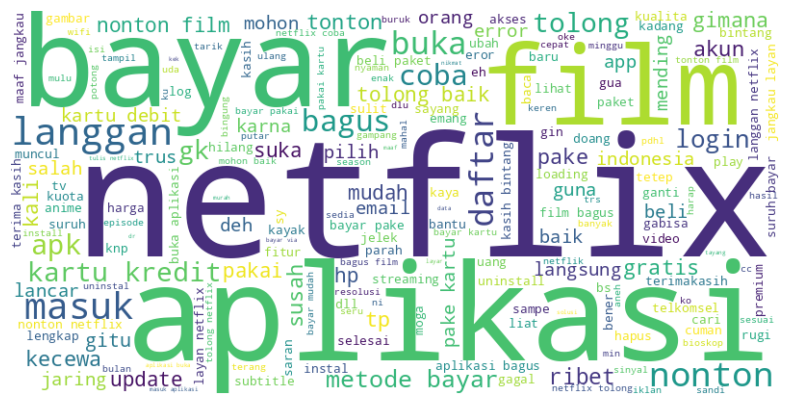

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(' '.join(map(str, content)) for content in my_df['content'])

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


# Tampilkan word cloud dengan matplotlib

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sentiment Analyst

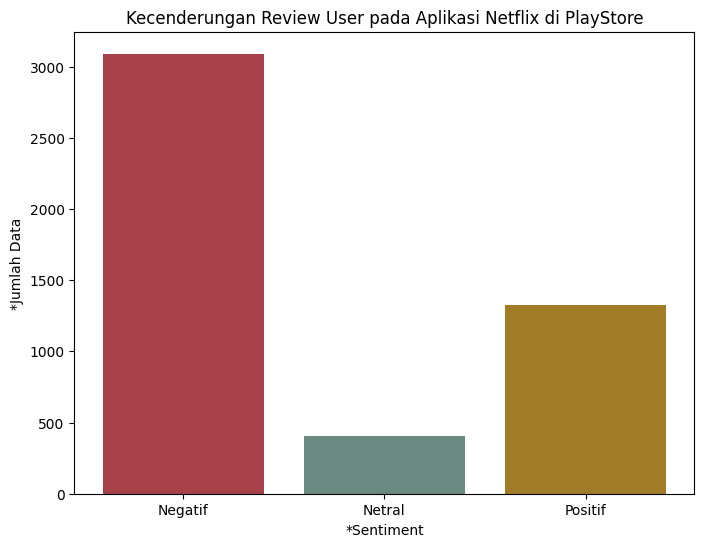

{'Negatif': 3091, 'Netral': 403, 'Positif': 1329}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
colors = {'Negatif': '#A7414A', 'Netral': '#6A8A82', 'Positif': '#A37C27'}
plt.bar(unique_targets, target_counts, color=[colors[Label]for Label in unique_targets])
plt.xlabel('*Sentiment')
plt.ylabel('*Jumlah Data')
plt.title('Kecenderungan Review User pada Aplikasi Netflix di PlayStore')
plt.show()

unique_targets, target_counts = np.unique(y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))